# Exercise 11: The Beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [5]:
# INSERT CODE HERE
library(class)
library(tidyverse)

data <- diamonds %>%
  mutate(price_bin = as.integer(if_else(price > mean(price), 1, 0)))

data <- data %>%
  select(carat, depth, table, x, y, price_bin)

head(data)
dim(data)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price. 

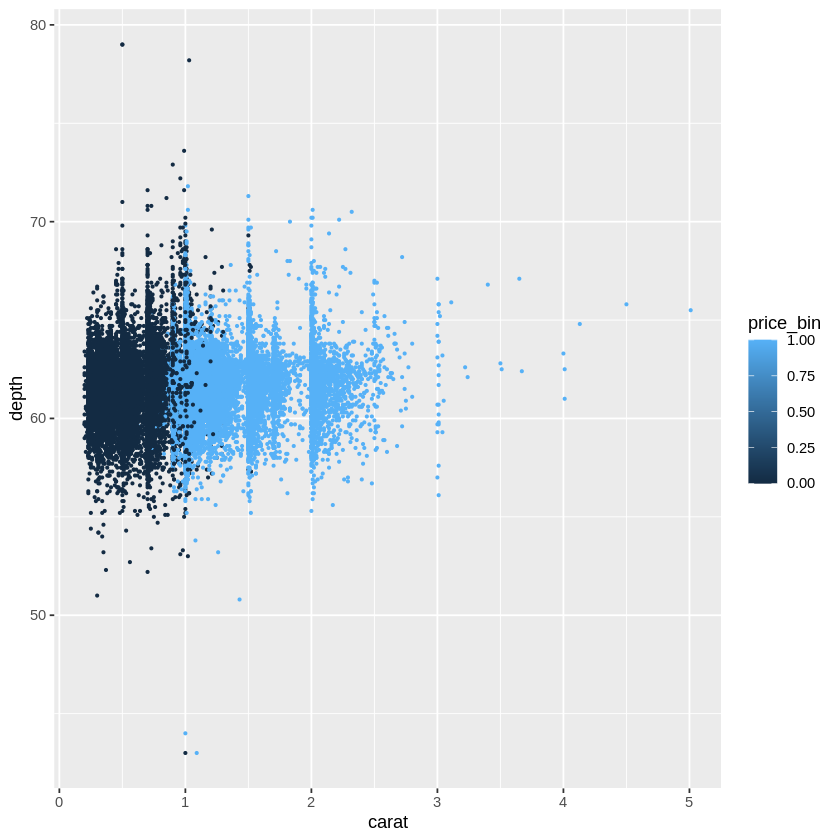

In [6]:
# INSERT CODE HERE
ggplot(data, aes(x=carat,y=depth,color=price_bin)) +
 geom_point(size=0.5)

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> * I think kNN will perform well using these two variables because there seems to be a relatively clear grouping of price_bin, though at the boundry between the groups there is some overlap.
>
> * Carat seems to give the most info about which price class the diamond belongs to.


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [20]:
set.seed(2023)

# INSERT CODE HERE
n_test <- 0.3 * nrow(data)
test.inds <- sample(1:nrow(data),n_test)

data$is.test <- 1:nrow(data) %in% test.inds
data$is.test <- as.numeric(data$is.test)

train <- filter(data, is.test == 0)

test <- filter(data, is.test == 1)

head(train)
dim(train)
head(test)
dim(test)


carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
0.23,61.5,55,3.95,3.98,0,0
0.23,56.9,65,4.05,4.07,0,0
0.29,62.4,58,4.20,4.23,0,0
0.31,63.3,58,4.34,4.35,0,0
0.24,62.8,57,3.94,3.96,0,0
0.24,62.3,57,3.95,3.98,0,0


[1] 37758     7

carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
0.21,59.8,61,3.89,3.84,0,1
0.30,64.0,55,4.25,4.28,0,1
0.30,62.0,54,4.31,4.34,0,1
0.30,63.4,54,4.23,4.29,0,1
0.30,62.7,59,4.21,4.27,0,1
0.23,63.8,55,3.85,3.92,0,1


[1] 16182     7

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`. 

*Hint: Review the format required for the arguments of knn()*

In [22]:
set.seed(2023)
# INSERT CODE HERE

train.preds <- cbind(train$carat, train$depth)
train.spec <- train$price_bin

test.preds <- cbind(test$carat, test$depth)

test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 3)


Now, output a confusion matrix and calculate the test error to evaluate model performance. 

In [29]:
# INSERT CODE HERE
confusion_df <- data.frame(predicted = test.spec.knn, actual = test$price_bin)
table(confusion_df)
print(paste("Test Error:", 1 - mean(confusion_df$predicted == confusion_df$actual)))


         actual
predicted    0    1
        0 9697  319
        1  549 5617

[1] "Test Error: 0.053639846743295"


How did your model perform?
> * The model performed relatively well, with a test error rate of about 5%
>
> 


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [30]:
set.seed(2023)
# INSERT CODE HERE
train.preds <- cbind(train$carat, train$depth, train$table, train$x, train$y)
train.spec <- train$price_bin

test.preds <- cbind(test$carat, test$depth, test$table, test$x, test$y)

test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 3)

confusion_df <- data.frame(predicted = test.spec.knn, actual = test$price_bin)
table(confusion_df)
print(paste("Test Error:", 1 - mean(confusion_df$predicted == confusion_df$actual)))


         actual
predicted    0    1
        0 9730  392
        1  516 5544

[1] "Test Error: 0.0561117290816957"


Did your model predictions improve?
> * The model predictions did not improve -- in fact the error rate increased slightly
>



# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy. 

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`. 

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [31]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [35]:
train.preds <- cbind(train$carat, train$depth)
train.spec <- train$price_bin
test.preds <- cbind(test$carat, test$depth)

for (k in seq(1:30)) {
    knn_fits  <- knn(train.preds, test.preds, train.spec, k)
    
    #overall error
    conf_df  <- data.frame(predicted = knn_fits, actual = test$price_bin)
    output$error[k]  <- 1 - mean(conf_df$predicted == conf_df$actual)
   
}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05413422
2,2,0.05357805
3,3,0.05320727
4,4,0.05302188
5,5,0.05271289
6,6,0.05160054


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


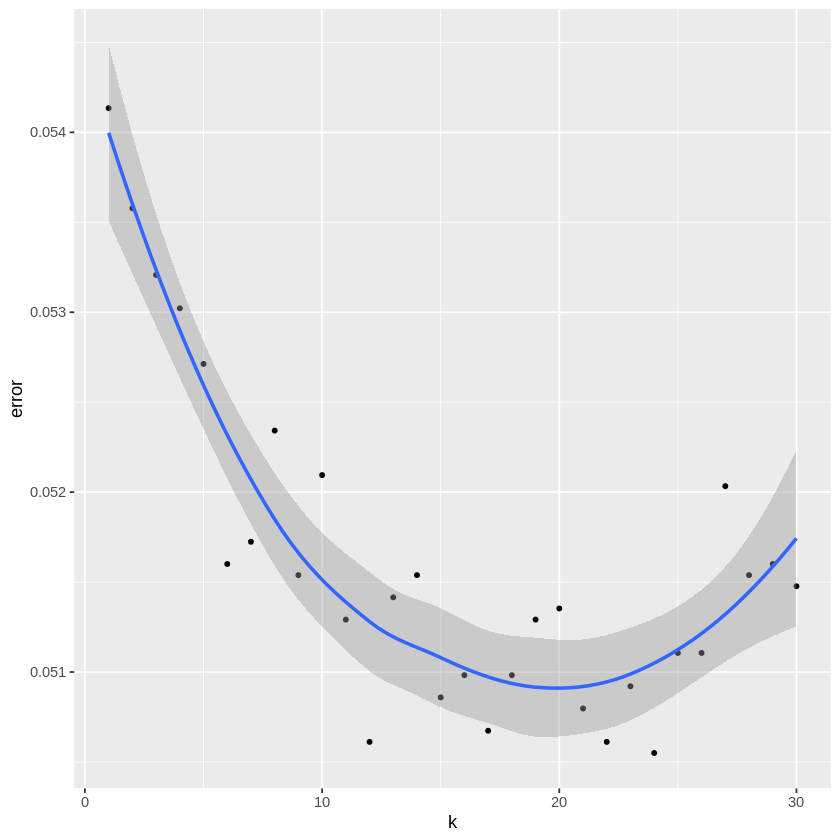

In [36]:
# INSERT CODE HERE
ggplot(output, aes(x=k,y=error)) +
 geom_point(size=1) +
 geom_smooth()

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> * Based on the plot, th ebest value of k is 20. This improves the test error by about 0.0025, or 0.25% compared to the first knn that was run.
>
> 


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [37]:
set.seed(2023)
#INSERT CODE HERE
train$stand_carat <- scale(train$carat)
train$stand_depth <- scale(train$depth)
test$stand_carat <- scale(test$carat)
test$stand_depth <- scale(test$depth)

train.preds <- cbind(train$stand_carat, train$stand_depth)
train.spec <- train$price_bin

test.preds <- cbind(test$stand_carat, test$stand_depth)

test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 20)

confusion_df <- data.frame(predicted = test.spec.knn, actual = test$price_bin)
table(confusion_df)
print(paste("Test Error:", 1 - mean(confusion_df$predicted == confusion_df$actual)))


         actual
predicted    0    1
        0 9717  290
        1  529 5646

[1] "Test Error: 0.0506117908787542"


What impact did rescaling the data have on your error rate?
> * Rescaling the data caused the error rate to drop below the lowest value in the previously plotted error rate graph. Therefore, this has resulted in the knn model with the best fit so far.
>
>  


**DUE:** 5pm March 22, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
